In [42]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)

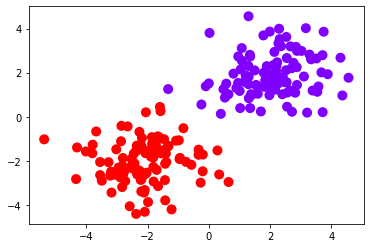

In [43]:
n_data = torch.ones(100, 2)
# torch.normal(mean, std) : 평균과 std의 경우 최종 아웃풋의 각각의 평균과 표준편차를 의미 
# feature 0
x0 = torch.normal(2*n_data, 1)
# label 0
y0 = torch.zeros(100)

# feature 1
x1 = torch.normal(-2*n_data, 1)
# label 1

y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='rainbow')
plt.show()

In [44]:
class Net(torch.nn.Module) : 
    def __init__(self, n_feature, n_hidden, n_output) : 
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x) : 
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [45]:
# featuer : x축과 y축 : 2개
# output : red or blue(0 or 1) : 2개
net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)


optimizer = torch.optim.SGD(net.parameters(), lr = 0.02)
loss_func = torch.nn.CrossEntropyLoss()

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [46]:
plt.ion()

/home/mbsiot/miniconda3/envs/drlnd/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


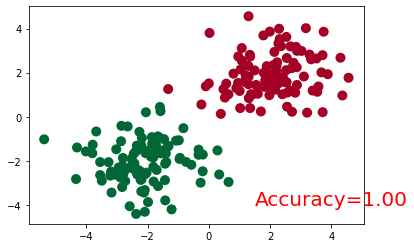

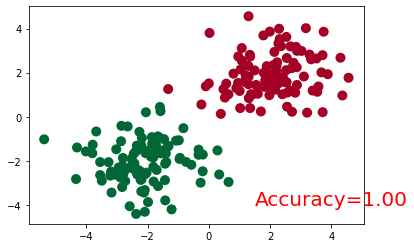

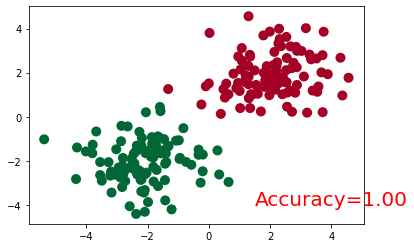

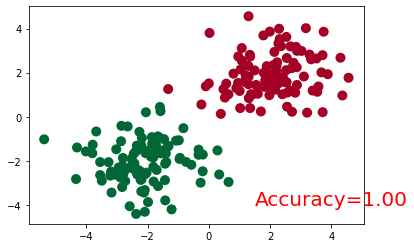

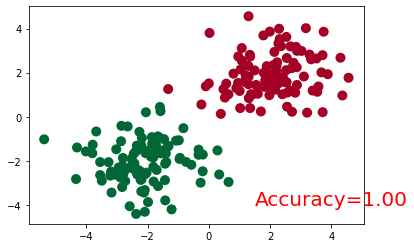

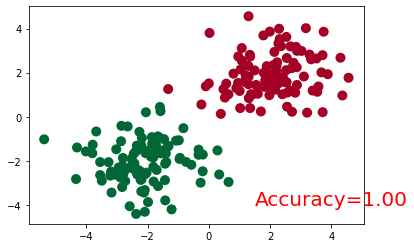

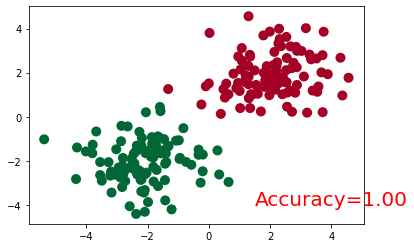

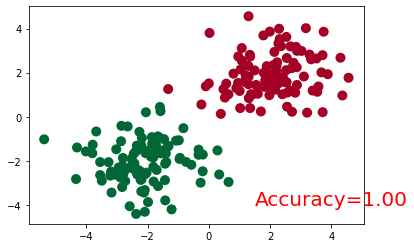

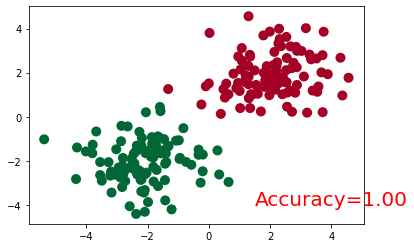

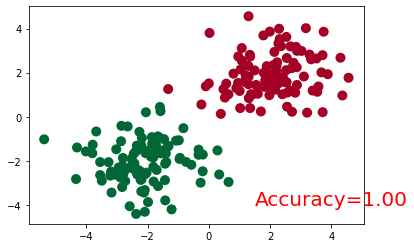

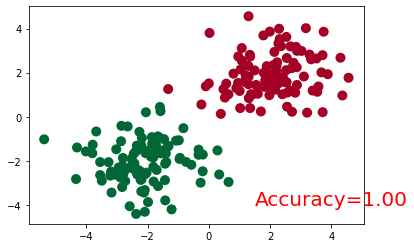

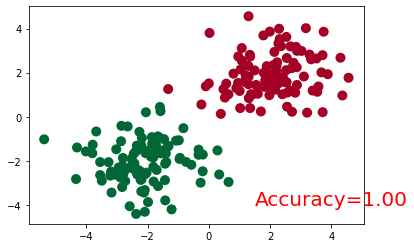

In [50]:
plt.ioff()
for t in range(100) : 
    out = net(x)
    loss = loss_func(out, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%10 == 0 or t in [3, 6] : 
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

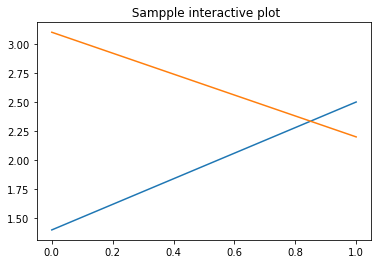

In [51]:
import matplotlib.pyplot as plt 
   
plt.ion() 
plt.plot([1.4, 2.5]) 
plt.title(" Sampple interactive plot") 
   
axes = plt.gca() 
axes.plot([3.1, 2.2]) 